Import necessary libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt

We will look at the simple two risky assets case with given mu and sigma. We
will create a portfolio consisting of these two assets. We first define the mu
vector and the covariance matrix.

In [11]:
mu = np.array([1, 0.8])
def cov_matrix(rho):
    return np.array([[0.1**2, rho * 0.1 * 0.12], [rho * 0.1 * 0.12, 0.12**2]])

We now define a function which returns the portfolio return and variance for
a given set of weights. 

In [12]:
def mu_sigma(weight, mu_vec, cov_mat):
    mu = np.dot(weight, mu_vec)
    sigma = np.sqrt(np.dot(weight.T, np.dot(cov_mat, weight)))
    return mu, sigma

Next, we define a function to get the portfolio return and variance for a set of
weights.

In [13]:
def mu_sigma_all_weights(rho, weight_list):
    portfolio_results = np.array(list(map(lambda weight: mu_sigma(weight, mu, cov_matrix(rho)), weight_list)))
    return portfolio_results[:, 0], portfolio_results[:, 1]

Now let's generate the weight list and plot the efficient frontier for a given 
rho (-0.5). Try other values and see what happens.

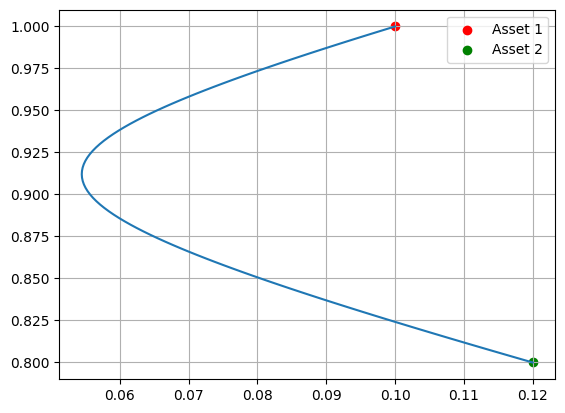

In [14]:
weight_list = list(map(lambda w: np.array([w, 1 - w]), np.arange(0, 1.01, 0.01)))
mu_list, sigma_list = mu_sigma_all_weights(-0.5, weight_list)
plt.plot(sigma_list, mu_list)
plt.grid()
plt.scatter(0.1, 1, label="Asset 1", color="red")
plt.scatter(0.12, 0.8, label="Asset 2", color="green")
plt.legend()
plt.show()